In [2]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax.numpy as jnp

|██████████| 100.0% ◆ elapsed 692.90ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:06<00:00,  8.08it/s]


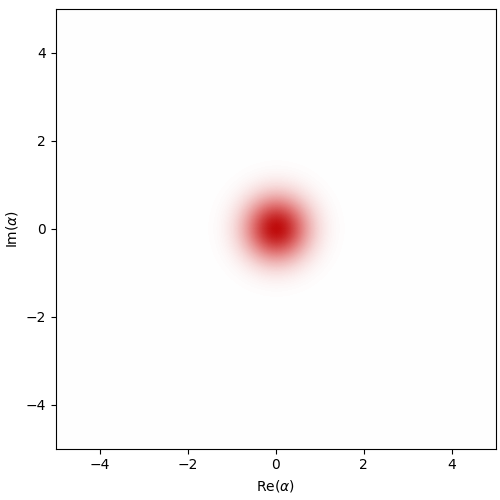

In [52]:
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

kappa_b = -2.5
epsilon_d = 10
g2 = 10

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
H = H2ph + Hd

tsave = jnp.linspace(0, 1, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b+0j) * b], psi0, tsave)
dq.plot.wigner_gif(res.states)